## Desafío - Máquinas de Soporte Vectorial
- Para realizar este desafío debes haber estudiado previamente todo el material
  disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
  requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
  - El desafío se debe desarrollar de manera Individual
  - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío
  - Máquinas de Soporte Vectorial.
  
### Requerimientos
Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El
objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que
predica de forma adecuada en base a una serie de atributos sobre la composición del
núcleo de una célula mamaria. Para más detalles técnicos asociados a la base de datos,
pueden hacer click en el link.

### Ejercicio 1: Preparar el ambiente de trabajo
- Importe todas las librerías a utilizar.
- Fije los parámetros de los gráficos con plt.Rcparams.
- Excluya las columnas id y Unnamed: 32 de la base de datos.
- Decodifique el vector objetivo diagnosis numérico para poder procesarlo
  posteriormente.

In [1]:
# Triada clasica y graficas seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modulos especializados de matplotlib
from matplotlib.gridspec import GridSpec

# Machine Learning
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Tratamiento de warnings e importacion de funciones
import warnings
import lec5_graphs as afx

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (6, 6)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets/breast_cancer.csv').drop(columns = ['id', 'Unnamed: 32'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
df['diagnosis'].value_counts('%')

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [6]:
df['diagnosis'] = df['diagnosis'].replace(['B', 'M'],[1, -1])
df['diagnosis'].value_counts()

 1    357
-1    212
Name: diagnosis, dtype: int64

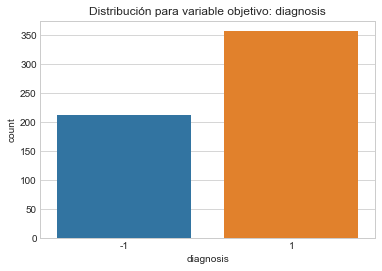

In [7]:
sns.countplot(x = df['diagnosis'])
plt.title(f'Distribución para variable objetivo: diagnosis')
plt.show()

### Ejercicio 2: Visualizando la distribución de los atributos
- Para cada uno de los atributos, grafique los histogramas condicional a cada clase del
  vector objetivo.
- Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los
  atributos con una mayor similitud en la distribución.

<Figure size 1440x1440 with 0 Axes>

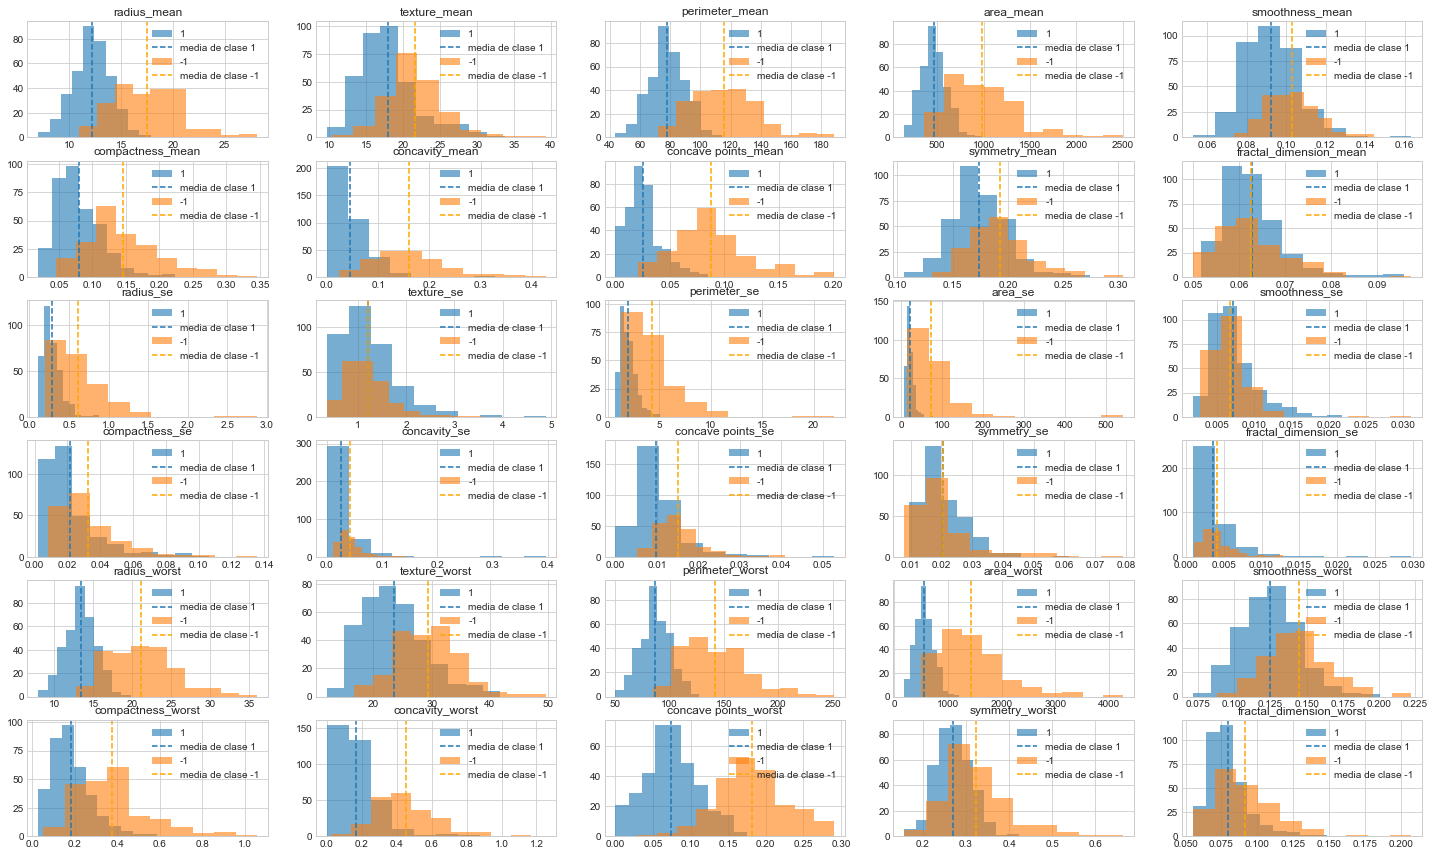

In [8]:
plt.figure(figsize = (20, 20))

columnas = df.drop(columns = 'diagnosis').columns

plt.figure(figsize=(25,15))
for i, colname in enumerate(columnas):
        plt.subplot(6,5,i+1)
        plt.title(colname)
        unos = df[df['diagnosis'] == 1][colname]
        menos_unos = df[df['diagnosis'] == -1][colname]
        plt.hist(unos, label='1' , alpha=.6)
        plt.axvline(unos.mean(), ls='--', label='media de clase 1')
        plt.hist(menos_unos, label='-1', alpha=.6)
        plt.axvline(menos_unos.mean(), ls='--', label='media de clase -1', color='orange')
        plt.legend()

In [9]:
df.shape

(569, 31)

### Ejercicio 3: Estimando el porcentaje de overlap en los atributos
- Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar
  con clases no separables mediante el proceso de kernelización. Resulta que un
  aspecto importante que muchas veces se obvia es medir la noseparabilidad de los
  atributos, condicional a cada clase del vector objetivo.
  
- El procedimiento para estimar el rango de noseparabilidad entre clases se
  implementa en Python de la siguiente manera

In [10]:
def histogram_overlap(df, attribute, target, perc=100):
        # get lower bound
        empirical_lower_bound = np.floor(df[attribute].min())
        # get upper bound
        empirical_upper_bound = np.ceil(df[attribute].max())
        # preserve histograms
        tmp_hist_holder = dict()
        # for each target class
        tar_values = df[target].unique()
        for unique_value in tar_values:
                # get histogram
                tmp, _ = np.histogram(
                        df[df[target] == unique_value][attribute],   # for a specific attribute
                        bins=perc,   # define percentage
                        range=[empirical_lower_bound, empirical_upper_bound]   # limit empirical range for comparison
)
        # append to dict
                tmp_hist_holder[f"h_{unique_value}"] = tmp
        get_minima = np.minimum(
                tmp_hist_holder[f"h_{tar_values[0]}"],
                tmp_hist_holder[f"h_{tar_values[1]}"]
        )
        intersection = np.true_divide(
                np.sum(get_minima),
                np.sum(tmp_hist_holder[f"h_{tar_values[0]}"])
        )
        return intersection

In [11]:
df_overlaping = pd.DataFrame([[colname, histogram_overlap(df, colname, 'diagnosis')] for colname in columnas], 
                        columns=['columna', 'overlap_coef']).sort_values(by='overlap_coef', ascending=False)
df_overlaping.head()

,columna,overlap_coef
19,fractal_dimension_se,1.000000
14,smoothness_se,0.995283
9,fractal_dimension_mean,0.990566
18,symmetry_se,0.957547
11,texture_se,0.924528


- La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde
  mayores niveles indican una mayor comunalidad.
- Utilizando la función, generará un data frame donde almacenará el nombre del
  atributo y su porcentaje. Ordene este data frame de forma descendente y preserve.

### Ejercicio 4: Selección del modelo por GridSearchCV
- Entrene una serie de modelos SVC con los siguientes hiper parámetros:
  - C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000].
  - gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10].
  - Validaciones cruzadas: 10.
- Genere un heatmap en base a los puntajes estimados con GridSearchCV.

Tip: Vea cómo acceder a la llave mean_test_score en el diccionario cv_results_.

#### Digresión: Un par de elementos a considerar en la implementación de GridSearchCV.
Si trabajamos con sklearn.model_selection.GridSearchCV, tan solo haciendo la
división en dos muestras es suficiente, incorporando los conjuntos X_train y y_train a
nuestro objeto instanciado y preservando X_test e y_test como una muestra de validación
externa. Si tenemos un archivo de testing externo, se recomienda no hacer división.

- El objeto creado con sklearn.model_selection.GridSearchCV sigue la misma
  funcionalidad de cualquier método de estimación de scikit-learn, con los pasos
  de Instanciar y Entrenar. Este objeto tendrá muchos elementos a considerar:
  - sklearn.model_selection.GridSearchCV.cv_results_ devolverá un
    diccionario donde las llaves representarán distintas métricas y los valores
    representarán el desempeño de cada modelo.
  - split: Indicará la métrica específica en cada validación cruzada y
    combinación de hiper parámetros.
  - time: Indicará el tiempo de ejecución en cada modelo.
  - Por lo general trabajaremos con mean_test_score y mean_train_score que
    representa la media de CV para cada combinación de hiper parámetros.
  - sklearn.model_selection.GridSearchCV.best_estimator_ devuelve un
    modelo listo para entrenar con la mejor combinación de hiper parámetros.
  - sklearn.model_selection.GridSearchCV.best_score_ devuelve el
    desempeño promedio del modelo en el testing interno. Si es un problema de
    clasificación devolverá Accuracy, si es un problema de regresión devolverá
    MSE.
- Reporte en qué rango de cada hiper parámetro el modelo presenta un desempeño
  eficiente. Reporte la mejor combinación de hiper parámetros y el desempeño en la
  muestra de entrenamiento.

In [12]:
# Dividimos las muestras
X = df.drop(columns='diagnosis')
y = df['diagnosis']
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 15820)
scaler = StandardScaler().fit(X_train_pre)
X_train = scaler.transform(X_train_pre)
X_test = scaler.transform(X_test_pre)

In [13]:
modelo = SVC(kernel = 'rbf')

In [14]:
hiper_parametros = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma':[0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [15]:
grilla =  GridSearchCV(modelo, hiper_parametros, cv = 10, return_train_score = True)

In [16]:
grilla.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True)

In [17]:
grilla.best_score_

0.9868421052631579

In [18]:
grilla.cv_results_['mean_test_score']

array([0.63778677, 0.63778677, 0.63778677, 0.63778677, 0.63778677,
       0.63778677, 0.63778677, 0.63778677, 0.63778677, 0.63778677,
       0.63778677, 0.63778677, 0.63778677, 0.63778677, 0.63778677,
       0.63778677, 0.63778677, 0.63778677, 0.63778677, 0.63778677,
       0.63778677, 0.63778677, 0.63778677, 0.69547908, 0.94750337,
       0.91336032, 0.63778677, 0.63778677, 0.63778677, 0.70074224,
       0.95276653, 0.97894737, 0.96052632, 0.63778677, 0.63778677,
       0.63778677, 0.95276653, 0.98157895, 0.98157895, 0.93954116,
       0.63778677, 0.63778677, 0.63778677, 0.98421053, 0.98421053,
       0.97112011, 0.93954116, 0.63778677, 0.63778677, 0.7060054 ,
       0.98684211, 0.97901484, 0.97375169, 0.93954116, 0.63778677,
       0.63778677])

In [19]:
df_resultados = pd.DataFrame(grilla.cv_results_['mean_test_score'].reshape(len(grilla.param_grid['C']),len(grilla.param_grid['gamma'])))

In [20]:
df_resultados.columns = grilla.param_grid['gamma']
df_resultados.index = grilla.param_grid['C']

Text(37.5, 0.5, 'C')

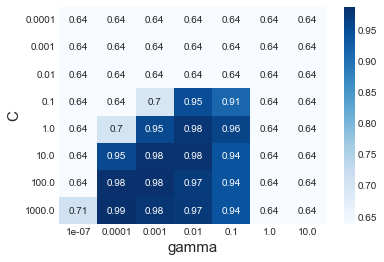

In [21]:
sns.heatmap(df_resultados, annot = True, cmap='Blues')
plt.xlabel('gamma', fontsize=15)
plt.ylabel('C', fontsize=15)

In [22]:
grilla.param_grid

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [23]:
def report_heatmaps(cv_trained):
        plt.figure(figsize=(10, 10))
        param1 = tuple(cv_trained.param_grid.keys())[0]
        param2 = tuple(cv_trained.param_grid.keys())[1]
        
        # Mejores parámetros subconjuntos para test
        plt.subplot(1, 2, 1)
        sns.heatmap(
        cv_trained.cv_results_['mean_test_score'].reshape(len(cv_trained.param_grid[param1]), len(cv_trained.param_grid[param2])),
        cmap='Blues',
        annot=True,
        xticklabels=cv_trained.param_grid[param2],
        yticklabels=cv_trained.param_grid[param1],
        cbar=False
        )
        
        plt.ylabel(param1)
        plt.xlabel(param2)
        plt.title('Test CV')
        
        # Mejores parámetros subconjuntos para train
        plt.subplot(1, 2, 2)
        sns.heatmap(
        cv_trained.cv_results_['mean_train_score'].reshape(len(cv_trained.param_grid[param1]), len(cv_trained.param_grid[param2])),
        cmap='Blues',
        annot=True,
        xticklabels=cv_trained.param_grid[param2],
        yticklabels=cv_trained.param_grid[param1],
        cbar=False
        )
        
        plt.ylabel(param1)
        plt.xlabel(param2)
        plt.title('Train CV')
        plt.tight_layout()

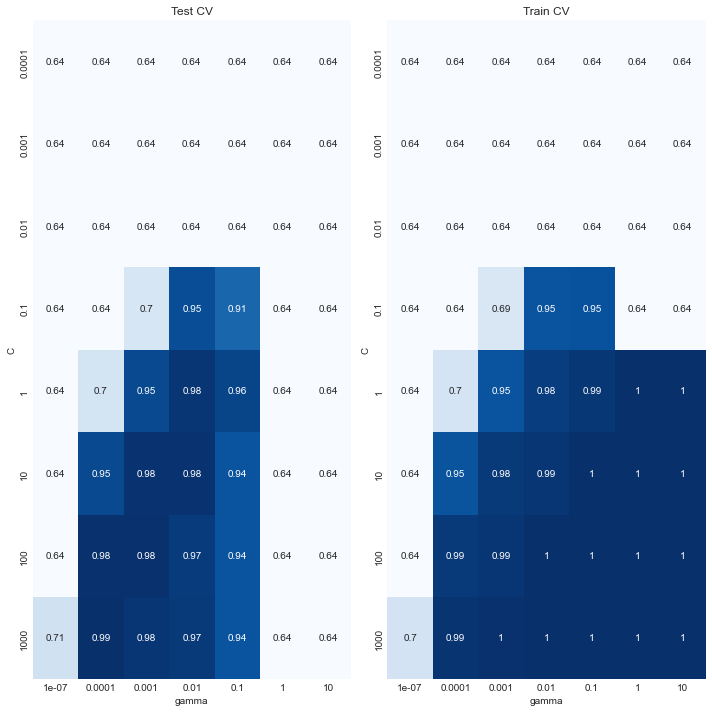

In [24]:
report_heatmaps(grilla)

In [25]:
print(f'''
Mejores hiper parametros: {grilla.best_params_}
Mejor puntaje: {grilla.best_score_}''')


Mejores hiper parametros: {'C': 1000, 'gamma': 0.0001}
Mejor puntaje: 0.9868421052631579


### Ejercicio 5: Validación del modelo en el Test set sample
- Genere las predicciones del Test set sample en base a la mejor combinación de hiper
  parámetros. Genere un reporte con las métricas de desempeño clásicas para los
  modelos de clasificación. Comente en qué casos el modelo presenta un desempeño
  deficiente.

In [26]:
y_hat = grilla.best_estimator_.predict(X_test)

In [27]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       0.97      0.93      0.95        74
           1       0.96      0.98      0.97       114

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



### Ejercicio (opcional): Depuración de atributos
- Reentrene el modelo en función de los atributos que presenten un coeficiente de
  overlap menor a .45.
- Reporte el desempeño del modelo y comente sobre los nuevos hiper parámetros
  estimados, así como su desempeño en comparación al modelo del ejercicio 5.


In [28]:
type(grilla.best_score_)

numpy.float64

In [29]:
df_overlaping.head()

,columna,overlap_coef
19,fractal_dimension_se,1.000000
14,smoothness_se,0.995283
9,fractal_dimension_mean,0.990566
18,symmetry_se,0.957547
11,texture_se,0.924528


In [30]:
# busqueda de variables con overlap < .45
for (label, content) in df_overlaping.iteritems():
    print('Nombre de la columna: ', label)
    print('Contenido de la columna: ', content.values)

Nombre de la columna:  columna
Contenido de la columna:  ['fractal_dimension_se' 'smoothness_se' 'fractal_dimension_mean'
 'symmetry_se' 'texture_se' 'compactness_se' 'smoothness_mean'
 'symmetry_mean' 'concave points_se' 'fractal_dimension_worst'
 'smoothness_worst' 'concavity_se' 'symmetry_worst' 'texture_mean'
 'texture_worst' 'compactness_mean' 'compactness_worst' 'perimeter_se'
 'radius_se' 'concavity_worst' 'area_se' 'radius_mean' 'concavity_mean'
 'area_mean' 'perimeter_mean' 'concave points_worst' 'concave points_mean'
 'radius_worst' 'perimeter_worst' 'area_worst']
Nombre de la columna:  overlap_coef
Contenido de la columna:  [1.         0.99528302 0.99056604 0.95754717 0.9245283  0.88207547
 0.87735849 0.85849057 0.85377358 0.83018868 0.76415094 0.75943396
 0.73584906 0.65566038 0.64150943 0.53301887 0.53301887 0.47169811
 0.46698113 0.35849057 0.3490566  0.31132075 0.30660377 0.30188679
 0.28301887 0.23584906 0.23113208 0.22641509 0.21698113 0.21698113]


In [31]:
# Seleccionamos variables con coeficiente de overlap < .45
df_menores = df[['compactness_worst', 'perimeter_se', 'radius_se', 'concavity_worst', 'area_se', 'radius_mean', 'concavity_mean',
'area_mean', 'perimeter_mean', 'concave points_worst', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']]
df_menores.head()

,compactness_worst,perimeter_se,radius_se,concavity_worst,area_se,radius_mean,concavity_mean,area_mean,perimeter_mean,concave points_worst,concave points_mean,radius_worst,perimeter_worst,area_worst
0,0.6656,8.589,1.0950,0.7119,153.40,17.99,0.3001,1001.0,122.80,0.2654,0.14710,25.38,184.60,2019.0
1,0.1866,3.398,0.5435,0.2416,74.08,20.57,0.0869,1326.0,132.90,0.1860,0.07017,24.99,158.80,1956.0
2,0.4245,4.585,0.7456,0.4504,94.03,19.69,0.1974,1203.0,130.00,0.2430,0.12790,23.57,152.50,1709.0
3,0.8663,3.445,0.4956,0.6869,27.23,11.42,0.2414,386.1,77.58,0.2575,0.10520,14.91,98.87,567.7
4,0.2050,5.438,0.7572,0.4000,94.44,20.29,0.1980,1297.0,135.10,0.1625,0.10430,22.54,152.20,1575.0


In [32]:
# Dividimos las muestras
X = df_menores
y = df['diagnosis']
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 15820)
scaler = StandardScaler().fit(X_train_pre)
X_train = scaler.transform(X_train_pre)
X_test = scaler.transform(X_test_pre)

In [33]:
modelo_menores = SVC(kernel = 'rbf')

In [34]:
hiper_parametros_menores = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma':[0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [35]:
grilla_menores =  GridSearchCV(modelo, hiper_parametros, cv = 10, return_train_score = True)

In [36]:
grilla_menores.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True)

In [37]:
grilla.best_score_

0.9868421052631579

In [38]:
grilla_menores.cv_results_['mean_test_score']

array([0.63778677, 0.63778677, 0.63778677, 0.63778677, 0.63778677,
       0.63778677, 0.63778677, 0.63778677, 0.63778677, 0.63778677,
       0.63778677, 0.63778677, 0.63778677, 0.63778677, 0.63778677,
       0.63778677, 0.63778677, 0.63778677, 0.64041835, 0.63778677,
       0.63778677, 0.63778677, 0.63778677, 0.67186235, 0.92125506,
       0.9317139 , 0.80067476, 0.63778677, 0.63778677, 0.67186235,
       0.92388664, 0.92381916, 0.93960864, 0.92381916, 0.63778677,
       0.63778677, 0.92125506, 0.9291498 , 0.94230769, 0.95796221,
       0.92645074, 0.64041835, 0.63778677, 0.9291498 , 0.94493927,
       0.93434548, 0.94480432, 0.92118758, 0.64041835, 0.67186235,
       0.94493927, 0.93441296, 0.96059379, 0.92645074, 0.92118758,
       0.64041835])

In [39]:
df_resultados_menores = pd.DataFrame(grilla_menores.cv_results_['mean_test_score'].reshape(len(grilla_menores.param_grid['C']),len(grilla_menores.param_grid['gamma'])))

In [40]:
df_resultados_menores.columns = grilla.param_grid['gamma']
df_resultados_menores.index = grilla.param_grid['C']

Text(37.5, 0.5, 'C')

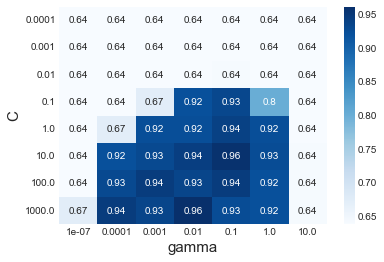

In [41]:
sns.heatmap(df_resultados_menores, annot = True, cmap='Blues')
plt.xlabel('gamma', fontsize=15)
plt.ylabel('C', fontsize=15)

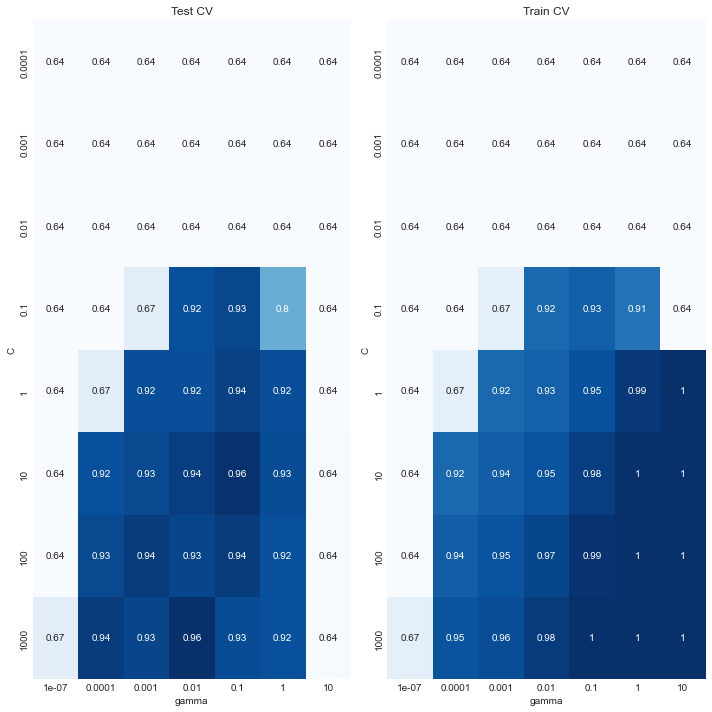

In [42]:
report_heatmaps(grilla_menores)

In [43]:
y_hat_menores = grilla_menores.best_estimator_.predict(X_test)

In [44]:
# Resultados del modelo con todas las variables
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       0.97      0.93      0.95        74
           1       0.96      0.98      0.97       114

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



In [45]:
# Resultados del modelo solo con variables con coeficiente overlap menor a .45
print(classification_report(y_test, y_hat_menores))

              precision    recall  f1-score   support

          -1       0.99      0.93      0.96        74
           1       0.96      0.99      0.97       114

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188

